In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('data/car_price.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data.drop_duplicates(keep = 'first', ignore_index=True, inplace = True) 
data.shape

(205, 26)

In [6]:
def null(data_frame): return data_frame[data_frame.isnull().any(axis=1)]
null(data)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [7]:
data.drop(columns=['car_ID', 'symboling', 'CarName'], inplace=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

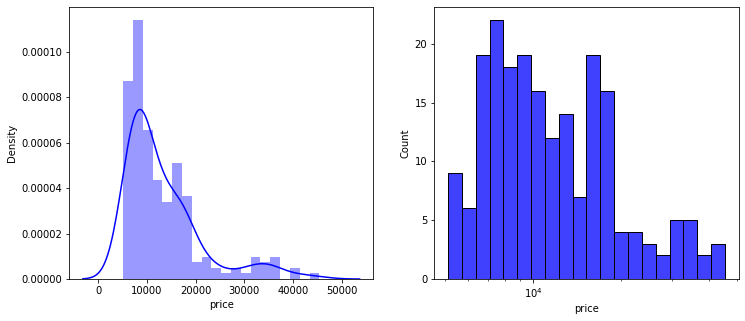

In [8]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2,figsize = (12,5))

sns.distplot(data['price'],color = "b", bins = 20, ax = ax1)
sns.histplot(data['price'],color = "b", bins = 20, log_scale = True, ax = ax2)

Text(0, 0.5, 'price')

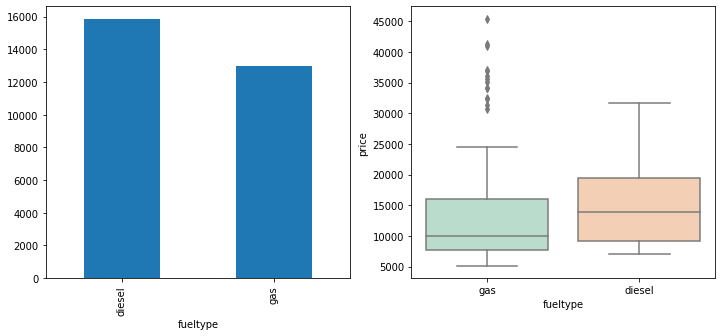

In [9]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2,figsize = (12,5))

fuel_type = data.groupby(['fueltype'])['price'].mean()
fuel_type.plot(y='price', kind='bar', ax=ax1)

sns.boxplot(x = 'fueltype', y = 'price', data = data, palette = 'Pastel2', ax=ax2)
plt.ylabel('price')

In [10]:
engine_loc = data.groupby(['enginelocation', 'aspiration'])['price'].mean()
car_body = data.groupby(['carbody', 'enginelocation', 'aspiration'])['price'].mean()


Text(0, 0.5, 'price')

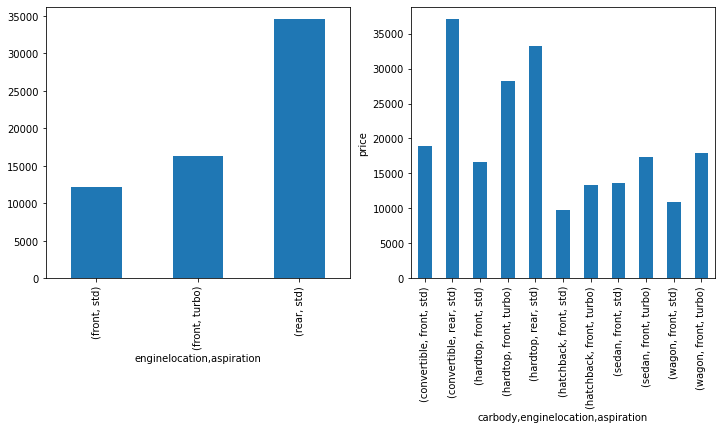

In [11]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2,figsize = (12,5))

engine_loc.plot(y='price', kind='bar', ax=ax1)
car_body.plot(y='price', kind='bar', ax=ax2)
plt.ylabel('price')

<AxesSubplot:xlabel='enginetype', ylabel='price'>

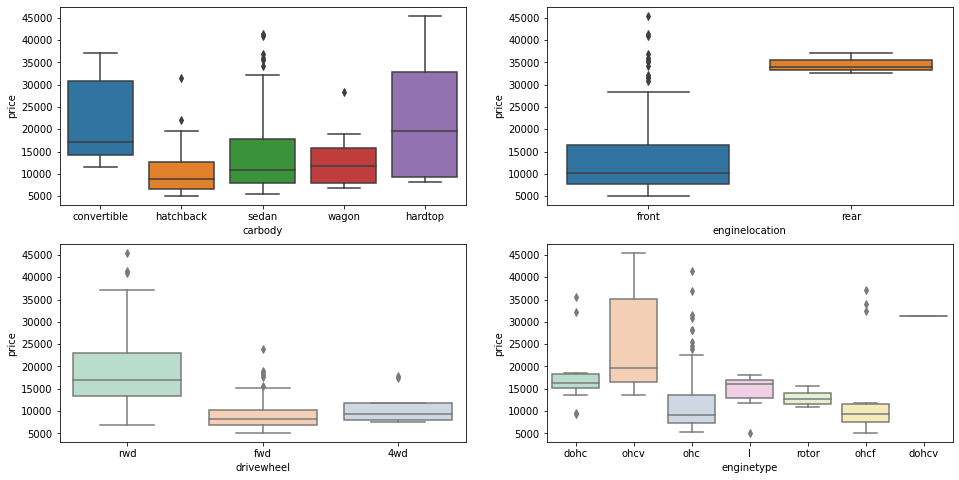

In [12]:
plt.figure(figsize=(16, 8))

plt.subplot(2,2,1)
sns.boxplot(x = 'carbody', y = 'price', data = data)

plt.subplot(2,2,2)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)

plt.subplot(2,2,3)
sns.boxplot(x = 'drivewheel', y = 'price', data = data, palette = 'Pastel2')

plt.subplot(2,2,4)
sns.boxplot(x = 'enginetype', y = 'price', data = data, palette = 'Pastel2')

In [13]:
most_advertised = data.groupby(['carbody', 'drivewheel', 'enginetype'])['price'].mean()
most_advertised

carbody      drivewheel  enginetype
convertible  fwd         ohc           11595.000000
             rwd         dohc          14997.500000
                         ohc           17669.000000
                         ohcf          37028.000000
                         ohcv          35056.000000
hardtop      fwd         ohc            8249.000000
             rwd         ohc           14365.750000
                         ohcf          33278.000000
                         ohcv          45400.000000
hatchback    4wd         ohc           17859.167000
                         ohcf           7603.000000
             fwd         dohc          18150.000000
                         l              5151.000000
                         ohc            8354.466667
                         ohcf           6085.500000
             rwd         dohc          14031.333333
                         dohcv         31400.500000
                         ohc           13158.428571
                         ohc

Text(0, 0.5, 'price')

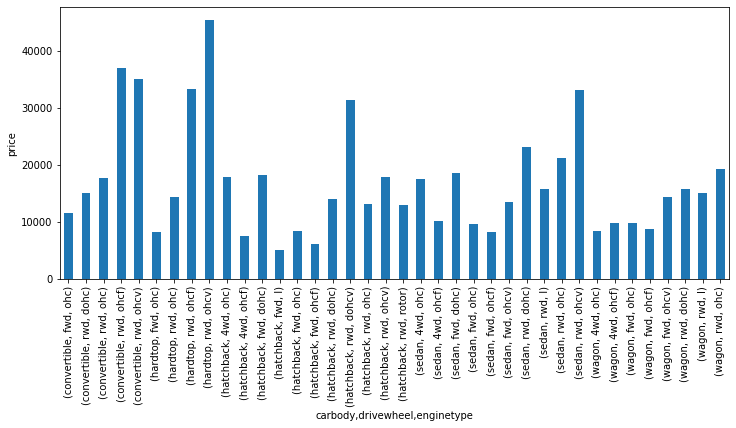

In [14]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1,figsize = (12,5))
most_advertised.plot(y='price', kind='bar', ax=ax1)
plt.ylabel('price')

<AxesSubplot:xlabel='price'>

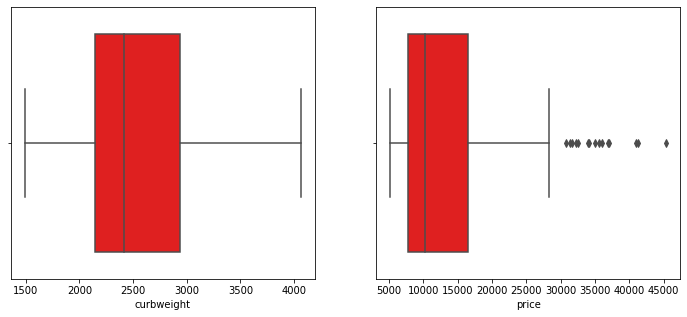

In [15]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2,figsize = (12,5))

sns.boxplot(data['curbweight'],color='red', ax=ax1)
sns.boxplot(data['price'],color='red', ax=ax2)

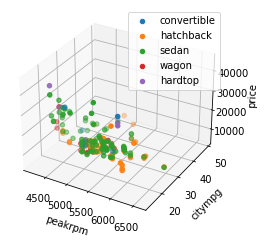

In [16]:
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for s in data['carbody'].unique():
    ax.scatter(data['peakrpm'][data.carbody==s], data['citympg'][data.carbody==s], data['price'][data.carbody==s], label=s)

ax.set_xlabel('peakrpm')
ax.set_ylabel('citympg')
ax.set_zlabel('price')

ax.legend(loc = 'upper right')

plt.show()

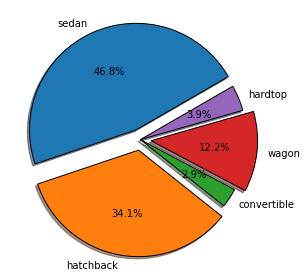

In [17]:
slices = [96, 70, 6,  25, 8]
labels = ['sedan', 'hatchback','convertible', 'wagon', 'hardtop']
explode = [0.1, 0.1, 0, 0.1, 0]
plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle=30, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of ages of diesel vehicles')

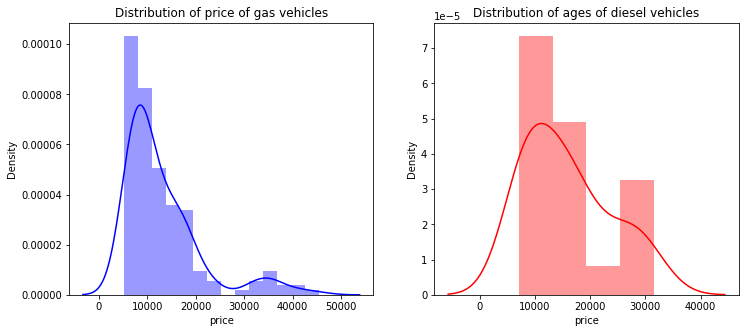

In [18]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.fueltype== 'gas')]["price"],color='b',ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(data[(data.fueltype == 'diesel')]['price'],color='r',ax=ax)
ax.set_title('Distribution of ages of diesel vehicles')

<AxesSubplot:xlabel='horsepower', ylabel='price'>

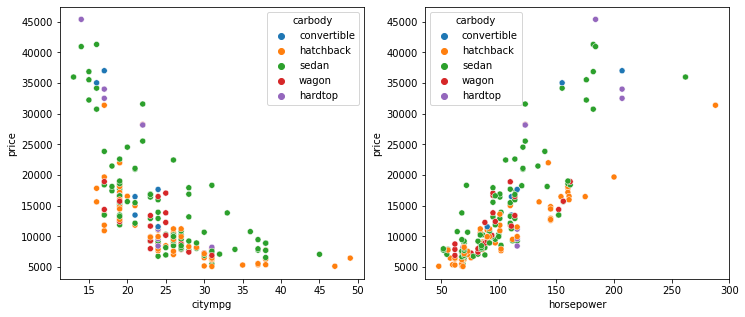

In [19]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2,figsize = (12,5))

sns.scatterplot(x="citympg", y="price", hue="carbody", data=data, color='b', ax=ax1)
sns.scatterplot(x="horsepower", y="price", hue="carbody", data=data, color='b', ax=ax2)

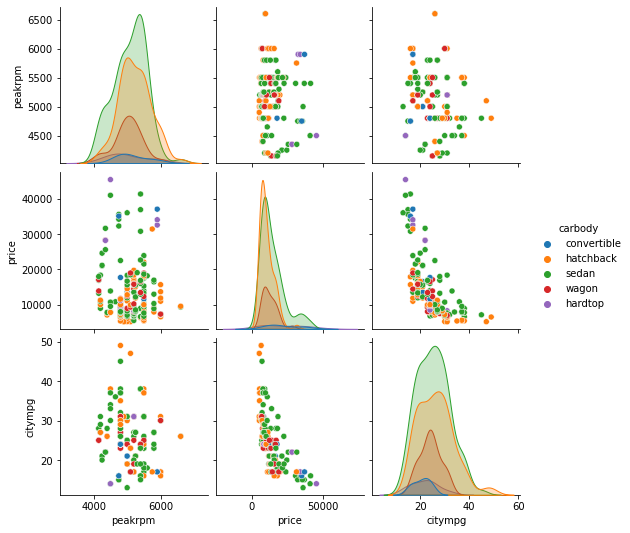

In [20]:
sns.pairplot(data[['peakrpm', 'price', 'carbody', 'citympg']], hue = "carbody")

In [21]:
data[['citympg', 'peakrpm', 'price']].corr().style.background_gradient(cmap="inferno")

,citympg,peakrpm,price
citympg,1.000000,-0.113544,-0.685751
peakrpm,-0.113544,1.000000,-0.085267
price,-0.685751,-0.085267,1.000000


<AxesSubplot:>

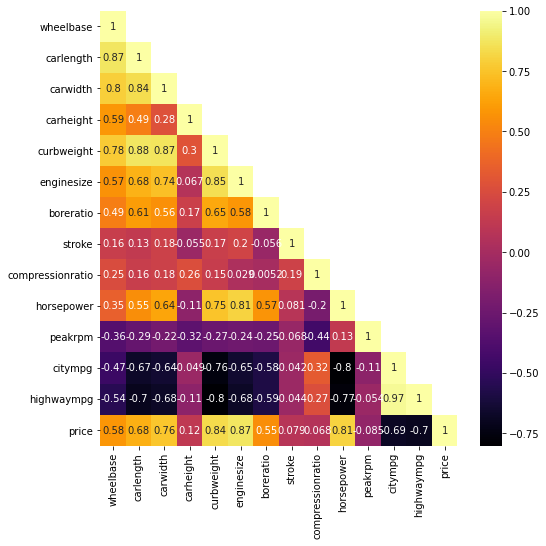

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='inferno',mask=np.triu(data.corr(),k=1))

In [23]:
data.select_dtypes(include=['object']).columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [24]:
X = data.drop(columns=['price'])
y = data['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0)
X_train.shape, X_test.shape

((164, 22), (41, 22))

In [25]:
# code from : https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/2-Feature%20Selection-%20Correlation.ipynb

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [26]:
corr_features = correlation(X_train, 0.75)
corr_features

{'carlength',
 'carwidth',
 'citympg',
 'curbweight',
 'enginesize',
 'highwaympg',
 'horsepower'}

In [27]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

X_train.shape, X_test.shape

((164, 15), (41, 15))

In [28]:
X_train['price'] = y_train
X_test['price'] = y_test

In [29]:
X_train.shape, X_test.shape

((164, 16), (41, 16))

In [30]:
processed_data = pd.concat([X_train, X_test], ignore_index = True)
processed_data.shape

(205, 16)

In [31]:
processed_data.to_csv('data/processed_data.csv',index=False)

<AxesSubplot:>

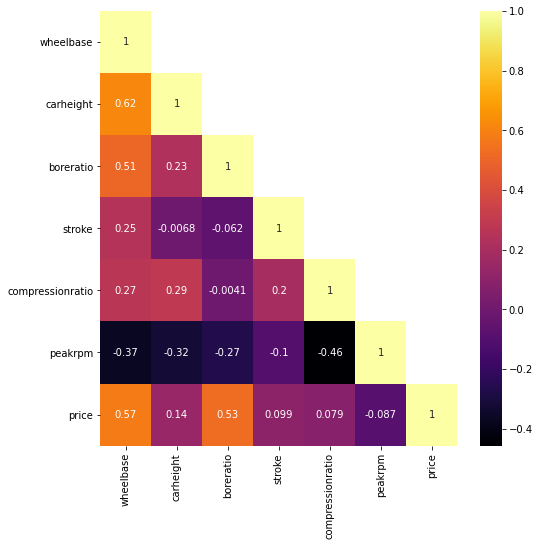

In [32]:
plt.figure(figsize=(8,8))
sns.heatmap(X_train.corr(),annot=True,cmap='inferno',mask=np.triu(X_train.corr(),k=1))

In [33]:
data = data[['carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']]

data.head()

,carwidth,curbweight,enginesize,horsepower,citympg,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,64.1,2548,130,111,21,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,64.1,2548,130,111,21,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,65.5,2823,152,154,19,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,66.2,2337,109,102,24,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,66.4,2824,136,115,18,gas,std,four,sedan,4wd,front,ohc,five,mpfi


<AxesSubplot:>

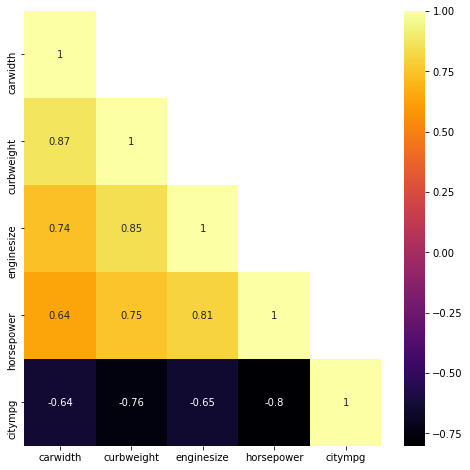

In [34]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, cmap='inferno', mask=np.triu(data.corr(),k=1))